In [ ]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [ ]:
class NN(nn.Module):
  def __init__(self, d_in, h, d_out):
    """
    d_in: tamanho de entrada dos dados da rede
    H: número de neuroneos da rede neural
    d_out: tamanho de saída dos dados da rede
    """
    super(NN, self).__init__()
    self.linear1 = nn.Linear(d_in, h)
    self.linear2 = nn.Linear(h, d_out)
    self.a1 = None
    self.l1 = None
    self.l2=None

  def forward(self, x):
    self.l1 = self.linear1(x)
    self.a1 = sigmoid(self.l1)
    self.l2=self.linear2(self.a1)
    yhat = sigmoid(self.linear2(self.a1))
    return yhat

In [ ]:
model = NN(1, 2, 1)
x = torch.tensor([[0.0], [2.0], [3.0]])
y = model(x)
print(y)

tensor([[0.4538],
        [0.3915],
        [0.3664]], grad_fn=<SigmoidBackward0>)


In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(1, 2, torch.nn.Sigmoid()),
                            torch.nn.Linear(2, 1, torch.nn.Sigmoid()))

In [ ]:
def PlotStuff(X, Y, model, epoch, leg=True):

    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [ ]:
def train(X, Y, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss
            total+=loss.item()
        cost.append(total)
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [ ]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [ ]:
x = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
y = torch.zeros(x.shape[0])
y[(x[:, 0] > -4) & (x[:, 0] < 4)] = 1.0

y = y.view(-1, 1).type(torch.FloatTensor)

parameters = model.parameters()
optimizer = torch.optim.SGD(parameters, lr=0.1)
criterion = nn.BCELoss()
epochs = 1000

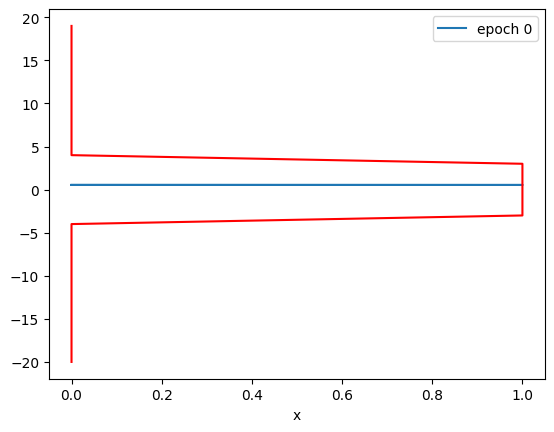

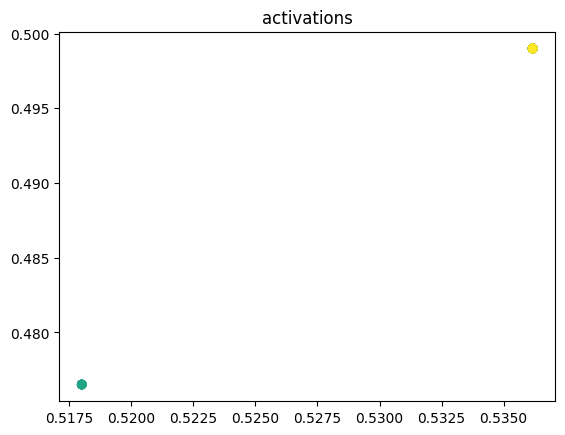

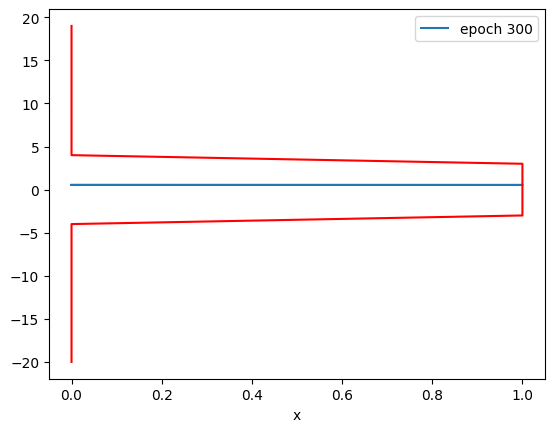

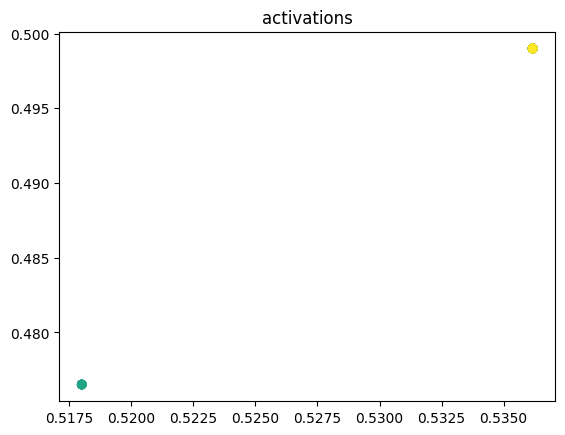

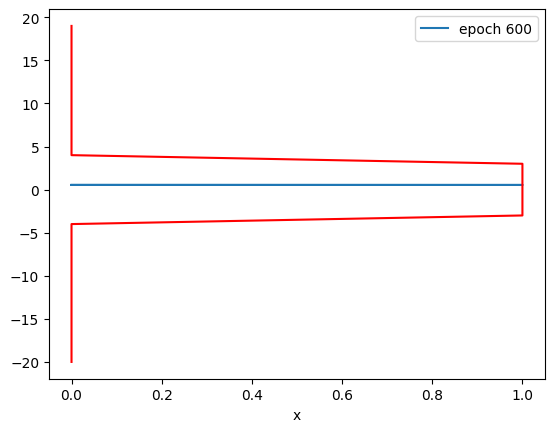

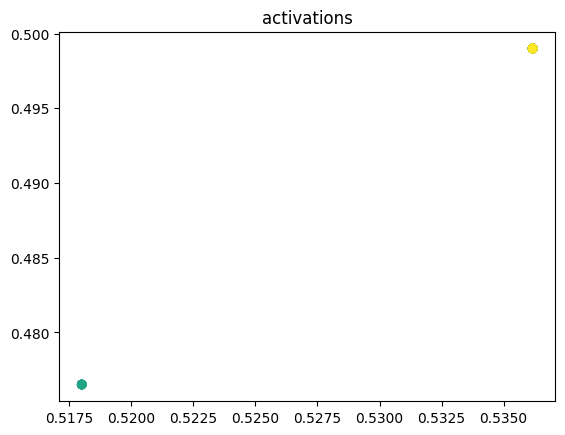

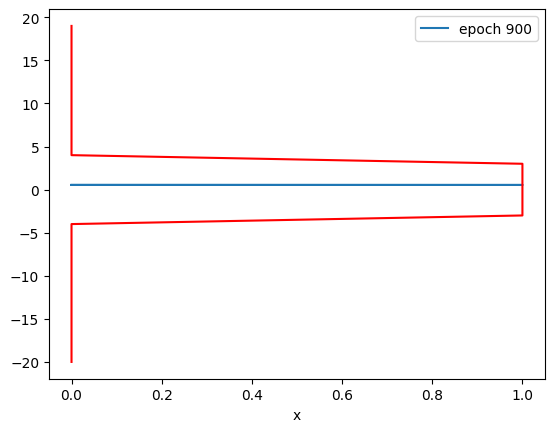

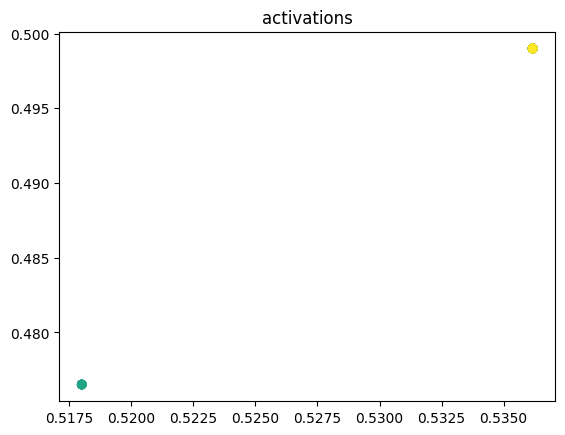

Text(0.5, 1.0, 'cross entropy loss')

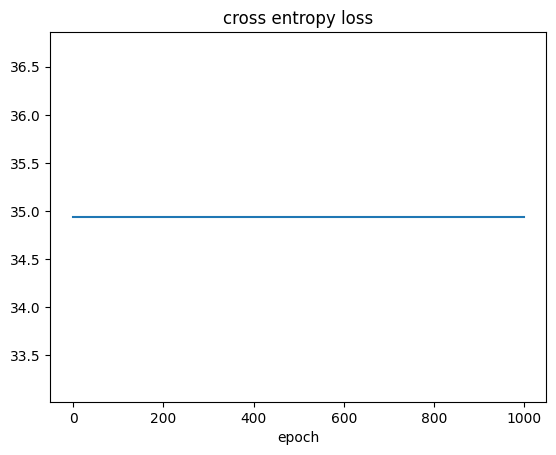

In [ ]:
input_dim = 1
hidden_dim = 2
output_dim = 1  # Saída única para classificação binária

model = NN(input_dim, hidden_dim, output_dim)

cost_cross = train(y, x, model, optimizer, criterion_cross, epochs=1000)

plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [ ]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.5444], grad_fn=<SigmoidBackward0>)

In [ ]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.5444],
        [0.5363],
        [0.5323]], grad_fn=<SigmoidBackward0>)

In [ ]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])